In [63]:
# Week 1

from math import log2
import numpy as np
import matplotlib.pyplot as plt
from contextlib import suppress

def infocontent(p):
    return - log2(p)

def entropy(p: np.array):
    if type(p) == list:
        p = np.array(p)
    if np.sum(p) != 1:
        raise Exception('The sum of the elements of p should be = 1: {}'.format(p))
    with suppress(ZeroDivisionError):
        H = - np.dot(p, np.where(p > 0, np.log2(p), 0))

    return  H


In [50]:
#from week1 import infocontent, entropy
import matplotlib.pyplot as plt
import numpy as np

infocontent(1/24)

4.584962500721156

In [49]:
entropy(np.array([0.1, 0.9]))

0.4689955935892812

<ipython-input-48-6c4d71ef9705>:13: RuntimeWarning: divide by zero encountered in log2
  return  - np.dot(p, np.where(p > 0, np.log2(p), 0))


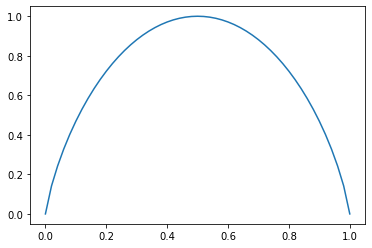

In [51]:
# Plot H(X) as a function of p(x=1) for binary X

x1=np.linspace(0, 1, num=51)
x2 = 1 - x1
x2


x = np.array(list(zip(x1,x2)))
x

plt.plot(x1, [ entropy(xi) for xi in x])

In [64]:
# test entropy
entropy([0.25, 0.25, 0.25, 0.25])

2.0

In [27]:
# 5. Coming back to the characters that we could play Guess Who? with on the Kooky characters sheet 
# (Links to an external site.), validate that (using your entropy function if you need to)

# (1) H(who) entropy of the characters identity - Question: who is your character? 
entropy([1/24 for i in range(24)])

4.584962500721155

In [62]:
# (2) H(one eye question) - Question : Does your character has one eye
entropy([5/24, 19/24])

NameError: name 'numpy' is not defined

In [60]:
# (3) H(Jason question) - - Question : Is your character Jason
entropy(np.array([1/24, 23/24]))

0.24988229283318544

In [54]:
# entropy([0, 0.5, 0.5])
# https://stackoverflow.com/questions/21752989/numpy-efficiently-avoid-0s-when-taking-logmatrix
# https://www.w3schools.com/python/numpy/numpy_ufunc_logs.asp
# https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python

p = np.array([0.1, 0.4, 0.5])
- np.dot(p, np.where(p > 0, np.log2(p), 0))

1.360964047443681

In [56]:
from scipy.stats import entropy
p = np.array([0, 0.5, 0.5])
entropy(p, base=2)

1.0